In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from matplotlib import cm
import math

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dtype=torch.float
device=torch.device("cpu")

In [ ]:
class NeuralNetwork(nn.Module):    
    def __init__(self):
        super(NeuralNetwork, self).__init__()
                
        super(NeuralNetwork, self).__init__()
        self.lin1 = torch.nn.Linear(2, 32)
        self.lin2 = torch.nn.Linear(32, 64)
        self.lin3 = torch.nn.Linear(64, 128)
        self.lin4 = torch.nn.Linear(128, 64)

        self.lin5 = torch.nn.Linear(64, 1)
        self.ReLU = torch.nn.ReLU()
        
        #self.model = nn.Sequential(
         #   nn.Linear(2,4),
          #  nn.ReLU(),
           # nn.Linear(4,3),
         #   nn.ReLU(),
          #  nn.Linear(3,2),
           # nn.ReLU(),
            #nn.Linear(2,5),
            #nn.Sigmoid(),
            #nn.Linear(5,1),
            #)

    def forward(self, x):
        x = self.lin1(x)
        x = x + torch.tanh(x)
        #x = self.ELU(x)
        
        x = self.lin2(x)
        x = x + self.ReLU(x)
        #x = self.ELU(x)
        
        x = self.lin3(x)
        x = x + torch.tanh(x)

        x = self.lin4(x)
        x = x + self.ReLU(x)

        x = self.lin5(x)
        x = x + torch.tanh(x)
        x = x.view(-1)
        return x

model=NeuralNetwork()
print(model)

NeuralNetwork(
  (lin1): Linear(in_features=2, out_features=32, bias=True)
  (lin2): Linear(in_features=32, out_features=64, bias=True)
  (lin3): Linear(in_features=64, out_features=128, bias=True)
  (lin4): Linear(in_features=128, out_features=64, bias=True)
  (lin5): Linear(in_features=64, out_features=1, bias=True)
  (ReLU): ReLU()
)


In [ ]:
x0=torch.tensor([0.5,0.5], dtype=dtype, device= device)
#choice=200
#d=2
#omega=[0,1]
#x1=torch.rand(choice,2,requires_grad=True)


#DIM MUST ALWAYS BE -1
def g2(x):
    x = x - x0
    x = x**2
    x = torch.sum(x, dim = -1)

    x = torch.log(x)
    return x




#def g2(x):

#    x1=x.index_select(-1, torch.tensor([0]))
#    x2=x.index_select(-1, torch.tensor([1]))
#    x= (torch.sin(x1*2*math.pi)+torch.cos(x2*2*math.pi))
#    return x
    
#def g2(x):
#    x=torch.sum(x, dim = -1)
#    x=torch.ones(x.size())
#    return x

def g2(x):
    x=x-x0
    x= x*5
    x1=x.index_select(-1, torch.tensor([0]))
    x2=x.index_select(-1, torch.tensor([1]))
    x = (x1**2+x2**2)**.5
    x=torch.sin(x)
    return x

#def g2(x):
    #for i in range(x.size(dim=0)):
    #    if (x[i][0] or x[i][1]) != (0 or 1):
    #        x= torch.cat((x[0:i], x[i+1:]), 0)
#    x=x-x0
#    x= x*2
#    x1=torch.abs(x.index_select(-1, torch.tensor([0])))
#    x2=torch.abs(x.index_select(-1, torch.tensor([1])))
#    x=x1+x2
#    return x

#def g2(x):
#    x = x-x0
#    x=torch.sum(x, dim = -1)
#    x=torch.cos(x*2*math.pi)
#    x=torch.sin(x)
#    return x

#def g2(x):
#    x=x-x0
#    x=x*3
#    x1=torch.abs(x.index_select(-1, torch.tensor([0])))
#    x2=torch.mul(x.index_select(-1, torch.tensor([1])), -1)
#    x=x1+x2
#    return x

#def g2(x):
#    x=x-x0
#    x1=x.index_select(-1, torch.tensor([0]))
#    x2=x.index_select(-1, torch.tensor([1]))
#    x=torch.zeros(x.size(dim=0))
#    for i in range(x.size(dim=0)):
#        if x1[i]==1 or x1[i]==0:
#            x[i]=torch.sum((x1[i],x2[i]))            
#        elif x2[i]==1 or x2[i]==0:
#            tmp=torch.sum((x1[i],x2[i]))
#            x[i]=tmp**2
#            x[i]=x[i]/4
#        else:
#            x[i]=torch.tensor([1])
#    return x


#def g2(x):
#    x=x-x0
#    x1=x.index_select(-1, torch.tensor([0]))
#    x2=x.index_select(-1, torch.tensor([1]))
#    x=torch.sin(x1*math.pi)-torch.cos(math.pi*x2)
#    return x



#def g2(x):
#    x1 = torch.zeros(x.size(dim = 0),1)

#    for i in range(x.size(dim = 0)):
#        if x[i][0] == 0:
#            x1[i] = torch.cos(2*math.pi*torch.sum(x[i]))

#        elif x[i][0]==1:

#            x1[i] = x[i][0]

#        elif x[i][1] == 0:
#            x1[i] = torch.cos(2*math.pi*x[i][0]) + torch.sin(2 * math.pi * x[i][1])
#
 #       elif x[i][1] == 1:
 #           x1[i] = torch.sin(math.pi*torch.sum(x[i])) + torch.cos(0.5* math.pi * torch.sum(x[i]))
 #       else:
 #           x1[i] = torch.sum(x[i])


#    return x1




    
#true_u=g2(x1)

#g=true_u

def divergence_bf(dx, y, **unused_kwargs):
    sum_diag = 0.
    for i in range(y.shape[1]):

        sum_diag += torch.autograd.grad(dx[:,i].sum(), y, create_graph=True)[0].contiguous()[:,i].contiguous()
    return sum_diag.contiguous()




## Compute the Laplacian of the network output with respect to its input
## model_output should be something like torch.nn.module and some output
## eg. set model = torch.nn.Linear(2,1)
## x = torch.randn((3,2))
## Then model output is
## output = model(x)
##
## The laplacian then becomes
##
## lap = laplacian(x,output)
def laplacian(input, model_output):
    """Verrified Same as Laplacian for use case"""
    ones = torch.ones(model_output.shape, device=model_output.device) 
    dx, = torch.autograd.grad(model_output, input, grad_outputs=ones, create_graph=True)

    tmp_norm = torch.ones((dx.size(dim=0),1))

    for i in range(dx.size(dim = 0)):
        tmp_norm[i] = torch.norm(dx[i]).clone().detach()


    tmp_norm = torch.sqrt(torch.add(torch.square(tmp_norm), 1))



    dx = torch.div(dx, tmp_norm)



    return torch.mul(divergence_bf(dx, input),-1)



In [ ]:
interior=1000
sides=200



sample_pts_int = torch.rand((interior,2), dtype=dtype, device = device, requires_grad=True)


# Generate random sample points on the interval (0,1)
base_sample = torch.rand((sides,1), dtype=dtype, device = device)





#def make_boundary(t, n):
    #o = torch.ones((n,1))
    #z = torch.zeros((n,1))
    #l1 = torch.cat((o,t), 1)
    #l2 = torch.cat((z,t), 1)
    #l3 = torch.cat((t,o), 1)
    #l4 = torch.cat((t,z), 1)
    #return torch.cat((l1,l2,l3,l4))

def make_boundary(t, n):
    o = torch.ones((n,1))
    z = torch.zeros((n,1))
    l1 = torch.cat((o,t), 1)
    l2 = torch.cat((z,t), 1)
    l3 = torch.cat((t,o), 1)
    l4 = torch.cat((t,z), 1)
    return torch.cat((l1,l2,l3,l4))


outsidepoints1=make_boundary(base_sample, sides)
#outsidepoints = outsidepoints1 - x0

#outsidepoints = outsidepoints ** 3
#outsidepoints = torch.sum(outsidepoints, dim=1)

#outsidepoints = torch.log(outsidepoints)


outsidepoints = g2(outsidepoints1).view(-1)


model = model.to(device)
# Right-hand side funciton of the Laplace equation (f(x)=0 for all x in this example, but can change to other functions for general Poisson equation)
fx =torch.zeros(interior, dtype=dtype, device= device)
#fx=  -1 * laplacian(sample_pts_int, g2(sample_pts_int))

In [ ]:
class loss_fn(torch.nn.Module):


    #newlaplacian=laplacian(x1,u_pred)

    #inside+=(torch.sum(torch.square(interior-fx))).tolist()
    ##for i in range(N1):
        ##inside+=(laplacian(x,u_pred)[i].item())**2
 
    #inside=inside/N1


    ##for j in range(N1):
        ##outside+=(u_pred[j]-g[j])[0]

#switch to u_pred on the border
    #outside+=(torch.sum(torch.square(g))).tolist()
    #outside=outside*Omega1
    #outside=outside/N1


    #loss=[inside+outside]

    #loss=torch.tensor(loss,requires_grad=True)

    def __init__(self):
        super(loss_fn, self).__init__()
        self.MSE = torch.nn.MSELoss(reduction='mean')
        self.L1 = torch.nn.L1Loss(reduction='mean')

    def forward(self, int_pred, int_true, bdry_pred, bdry_true):
        # Loss function of network parameters is the sum of MSE in PDE and MSE in boundary condition
        # Weight parameter of the boundary term is lambda = 1.0
        # the weight is alpha
        return self.MSE(int_pred, int_true)  +  100 * self.MSE(bdry_pred, bdry_true)





optimizer = torch.optim.Adam(model.parameters(), lr=0.001,betas=(0.9,0.999),eps=1e-05,weight_decay=0,amsgrad=False)

loss_fn_v2 = loss_fn()
iter_rec = np.array([])
error_PDE = np.array([])
error_bdry = np.array([])
L1Er = torch.nn.L1Loss(reduction='mean')
MSE = torch.nn.MSELoss(reduction='mean')


epoch = 1000

for t in range(epoch):
    model.train()
    u_pred_interior = model(sample_pts_int)

    u_lap = laplacian(sample_pts_int, u_pred_interior)

    u_pred_exterior= model(outsidepoints1)


    loss = loss_fn_v2(u_lap, fx, u_pred_exterior, outsidepoints)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward(retain_graph=True)         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    if t%20 == 0:
        iter_rec = np.append(iter_rec, t)
        e_bdry = L1Er(u_pred_exterior, outsidepoints)
        e_PDE = L1Er(u_lap, fx)
        error_bdry = np.append(error_bdry, e_bdry.item())
        error_PDE = np.append(error_PDE, e_PDE.item())
        print(loss.item())


print('training done')


85.13772583007812
64.90159606933594
45.910091400146484
25.4577579498291
15.30989933013916
9.672965049743652
6.817014217376709
5.533345699310303
5.59285831451416
4.406266212463379
4.095337867736816
5.251418590545654
3.8322501182556152
3.53511381149292
3.3610897064208984
4.543304443359375
3.119398832321167
2.9567079544067383
7.028822898864746
3.539400100708008
2.858353853225708
2.656879425048828
2.537588596343994
3.1122894287109375
2.9423232078552246
2.450805425643921
2.3640432357788086
2.282198190689087
2.2584447860717773
2.86769437789917
2.46410870552063
2.2015490531921387
2.119410514831543
2.054837226867676
2.0049798488616943
1.9547033309936523
9.857270240783691
2.1490533351898193
2.072810649871826
1.9786407947540283
1.9175269603729248
1.8664886951446533
1.8227641582489014
1.7890034914016724
1.750950813293457
3.355593681335449
3.1013875007629395
2.1324315071105957
1.8525669574737549
1.788565754890442
training done


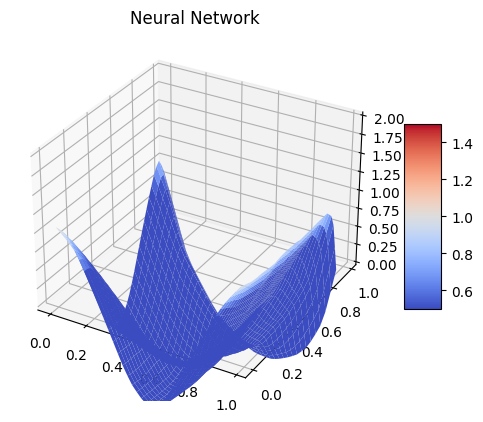

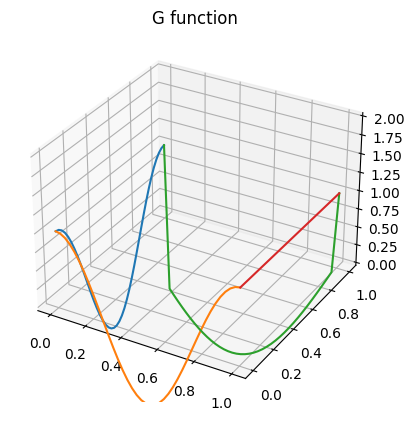

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(projection ='3d')


x = np.arange(0,1,0.025)
y = np.arange(0,1,0.025)

x, y = np.meshgrid(x,y)

newu = np.zeros((40,40))
org = np.copy(newu)
for j in range(x.shape[1]):
    for i in range(y.shape[0]):
        tmp = torch.tensor([float(x[i][j]), float(y[i][j])])
        newu[i][j]= model(tmp)
      
neural = ax.plot_surface(x,y, newu, cmap=cm.coolwarm, vmin = 0.5, vmax = 1.5)
ax.set_zlim3d(0, 2)
fig.colorbar(neural, shrink=0.5, aspect=5)
plt.title("Neural Network")
plt.show()

fig=plt.figure()
ax1 = fig.add_subplot(projection ='3d')
#for j in range(x.shape[1]):
#    if j == 0 or j == 39:
#        for i in range(y.shape[0]):
#            tmp = torch.tensor([float(x[i][j]), float(y[i][j])])
#            org[i][j]= g2(tmp)
#    else:
#        tmp = torch.tensor([float(x[0][j]), float(y[0][j])])
#        org[0][j] = g2(tmp)
#        tmp2 = torch.tensor([float(x[-1][j]), float(y[-1][j])])
#        org[-1][j] = g2(tmp2)
      
x = np.linspace(0,1, 40)
y = np.linspace(0,1,40)
zeros = np.zeros(40)
ones = np.ones(40)
#original = ax1.plot_surface(x,y, org, cmap=cm.coolwarm, vmin = 0.5, vmax = 1.5)

tmp1 = g2(torch.from_numpy(np.linspace((0,0),(0,1),40))).flatten()
tmp2 = g2(torch.from_numpy(np.linspace((0,0),(1,0),40))).flatten()
tmp3 = g2(torch.from_numpy(np.linspace((1,1),(0,1),40))).flatten()
tmp4 = g2(torch.from_numpy(np.linspace((1,1),(1,0),40))).flatten()


ax1.plot3D(zeros,y,tmp1)
ax1.plot3D(x,zeros,tmp2)
ax1.plot3D(x, ones,tmp3)
ax1.plot3D(ones,y,tmp4)

ax1.set_zlim3d(0, 2)
#fig.colorbar(original, shrink=0.5, aspect=5)
plt.title("G function")
plt.show()

#x1=[]
#x2=[]
#for i in x:
##    x1.append(i[0])
#    x2.append(i[1])



#ax.plot_surface(x1,x2, )
#ax.set_title('Original U function')
#plt.show()

#fig = plt.figure()
#ax = plt.axes(projection ='3d')


#ax.plot_surface(x1,x2, usecond)
#ax.set_title('Neural Network')
#plt.show()

/tmp/ipykernel_918/3255721067.py:6: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  xstep = torch.range(0,1,1/(step-1))
/tmp/ipykernel_918/3255721067.py:7: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  ystep = torch.range(0,1,1/(step-1))
/tmp/ipykernel_918/3255721067.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


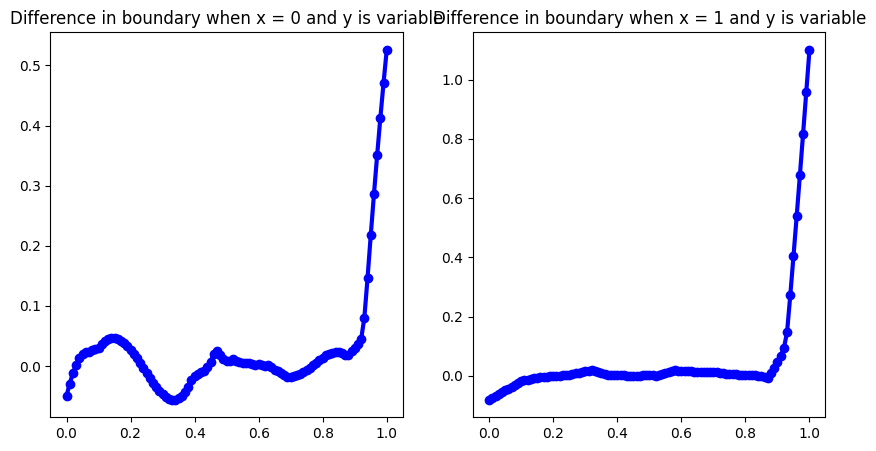

In [ ]:
fig = plt.figure(figsize=(10.0, 5.0))
ax = plt.axes()
step = 101
dummy0= torch.zeros(step)
dummy1 = torch.ones(step)
xstep = torch.range(0,1,1/(step-1))
ystep = torch.range(0,1,1/(step-1))

bound1 = g2(torch.stack((dummy0, ystep), dim = -1))
model1 = model(torch.stack((dummy0, ystep), dim =-1))
bound1 = bound1.view(-1)
bound1 = (bound1 - model1).detach().numpy()
plt.subplot(1,2,1)
plt.gca().set_title('Difference in boundary when x = 0 and y is variable')
plt.plot(ystep, bound1, color='blue', linewidth=3, linestyle='-', marker='o', markersize=6)

bound2 = g2(torch.stack((dummy1, ystep), dim = -1))
model2 = model(torch.stack((dummy1, ystep), dim =-1))
bound2 = bound2.view(-1)
bound2 = (bound2 - model2).detach().numpy()
plt.subplot(1,2,2)
plt.gca().set_title('Difference in boundary when x = 1 and y is variable')
plt.plot(ystep, bound2, color='blue', linewidth=3, linestyle='-', marker='o', markersize=6)




/tmp/ipykernel_918/3411173381.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


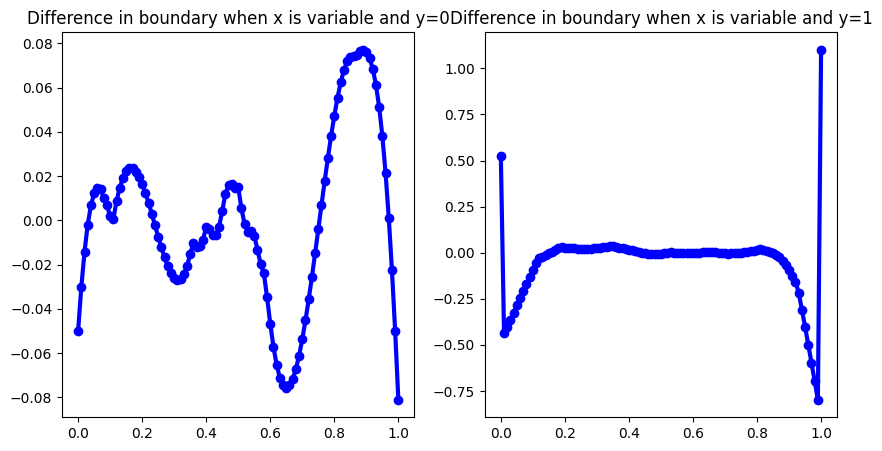

In [ ]:
fig = plt.figure(figsize=(10.0, 5.0))
ax = plt.axes()
bound3 = g2(torch.stack((xstep, dummy0), dim = -1))
model3 = model(torch.stack((xstep, dummy0), dim =-1))
bound3 = bound3.view(-1)
bound3 = (bound3 - model3).detach().numpy()
plt.subplot(1,2,1)
plt.gca().set_title('Difference in boundary when x is variable and y=0')
plt.plot(xstep, bound3, color='blue', linewidth=3, linestyle='-', marker='o', markersize=6)

bound4 = g2(torch.stack((xstep, dummy1), dim = -1))
model4 = model(torch.stack((xstep, dummy1), dim =-1))
bound4 = bound4.view(-1)
bound4 = (bound4 - model4).detach().numpy()
plt.subplot(1,2,2)
plt.gca().set_title('Difference in boundary when x is variable and y=1')
plt.plot(xstep, bound4, color='blue', linewidth=3, linestyle='-', marker='o', markersize=6)

/tmp/ipykernel_918/2741390886.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


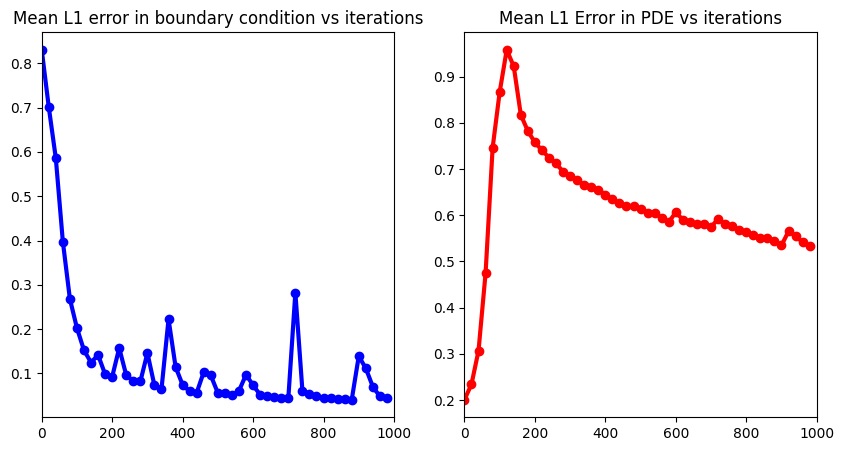

In [ ]:
fig = plt.figure(figsize=(10.0, 5.0))
ax = plt.axes()

# Plot the error of u in boundary condition versus iteration number
plt.subplot(1,2,1)
plt.gca().set_title('Mean L1 error in boundary condition vs iterations')
plt.xlim(0, epoch)

plt.plot(iter_rec, error_bdry, color='blue', linewidth=3, linestyle='-', marker='o', markersize=6)
#ax.set(xlabel='Iteration', ylabel='$||u-g||_{L^{1}(\partial\Omega)}$')

# Plot the error of PDE (i.e., |Laplace(u)(x)| averaged over meshpoints x) versus iteration number
plt.subplot(1,2,2)
plt.gca().set_title('Mean L1 Error in PDE vs iterations')
plt.xlim(0, epoch)

plt.plot(iter_rec, error_PDE, color='red', linewidth=3, linestyle='-', marker='o', markersize=6)
#ax.set(xlabel='Iteration', ylabel='$||\Delta u_{\theta} + f||_{L^{1}(\Omega)}$')

In [ ]:
print(error_bdry)

[0.83045733 0.70119065 0.58566612 0.397259   0.26801443 0.20233487
 0.15222946 0.12467838 0.1416368  0.09803152 0.09249882 0.15724337
 0.09562007 0.0832467  0.08186524 0.14612141 0.07281822 0.06457131
 0.22259468 0.11465782 0.07410708 0.05979532 0.05666901 0.10330191
 0.09552914 0.05582905 0.05559379 0.05116481 0.06091683 0.09728166
 0.07320379 0.05198533 0.04963301 0.04705317 0.04503114 0.04369146
 0.28225744 0.06118381 0.05386162 0.04802954 0.04515015 0.04346791
 0.04238075 0.04140325 0.04056516 0.13901076 0.11150097 0.0699048
 0.04809019 0.0442283 ]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3b55bc21-ea34-4a05-85bb-a30a7974d2b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>